In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# https://www.kaggle.com/c/mens-march-mania-2022/data
file_path = 'mens-march-mania-2022/MDataFiles_Stage1/'

# regular season data
data_regszn = pd.read_csv(file_path + 'MRegularSeasonDetailedResults.csv')

# tournament data
data_tournament = pd.read_csv(file_path + 'MNCAATourneyDetailedResults.csv')

In [3]:
data_regszn.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [4]:
data_tournament.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [5]:
combined_data = pd.concat([data_regszn, data_tournament])

In [6]:
# extract all game stats of the winning team
# year, daynum, teamID, and numOT ignored
wins_data = combined_data[['WScore', 'WLoc', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 
                  'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]

wins_data.rename(columns = {'WScore':'Score', 
                            'WLoc':'Loc',
                            'WFGM':'FGM',
                            'WFGA':'FGA',
                            'WFGM3':'FGM3',
                            'WFGA3':'FGA3',
                            'WFTM':'FTM',
                            'WFTA':'FTA',
                            'WAst':'Ast',
                            'WOR':'OR',
                            'WDR':'DR',
                            'WTO':'TO',
                            'WStl':'Stl',
                            'WBlk':'Blk',
                            'WPF':'PF'
                           }, inplace = True)

wins_data['Won'] = 1

wins_data['Loc'] = wins_data['Loc'].map({'H':1, 'N':0, 'A':-1})

/tmp/ipykernel_5874/3365504104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_data.rename(columns = {'WScore':'Score',
/tmp/ipykernel_5874/3365504104.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_data['Won'] = 1
/tmp/ipykernel_5874/3365504104.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_da

In [7]:
# do the same thing for losses
# there is no LLoc, only WLoc, so reverse it when mapping
losses_data = combined_data[['LScore', 'WLoc', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 
                  'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]

losses_data.rename(columns = {'LScore':'Score', 
                            'WLoc':'Loc',
                            'LFGM':'FGM',
                            'LFGA':'FGA',
                            'LFGM3':'FGM3',
                            'LFGA3':'FGA3',
                            'LFTM':'FTM',
                            'LFTA':'FTA',
                            'LAst':'Ast',
                            'LOR':'OR',
                            'LDR':'DR',
                            'LTO':'TO',
                            'LStl':'Stl',
                            'LBlk':'Blk',
                            'LPF':'PF'
                           }, inplace = True)

losses_data['Won'] = 0

losses_data['Loc'] = losses_data['Loc'].map({'H':-1, 'N':0, 'A':1})

/tmp/ipykernel_5874/408430235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses_data.rename(columns = {'LScore':'Score',
/tmp/ipykernel_5874/408430235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses_data['Won'] = 0
/tmp/ipykernel_5874/408430235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses

In [8]:
# combine wins and losses dataframes
data = pd.concat([wins_data, losses_data])

# shuffle data
data = data.sample(frac = 1)

data.head()

,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Won
62756,75,-1,31,57,2,3,11,17,8,26,10,10,9,3,18,1
39470,52,-1,16,63,3,20,17,25,12,16,8,14,8,3,23,0
65348,66,1,24,52,8,22,10,11,9,22,19,14,6,4,13,0
75063,73,1,24,64,5,22,20,23,18,28,13,20,9,3,17,1
24535,78,-1,32,59,6,12,8,16,13,22,15,15,19,4,19,1


In [9]:
# sorts columns by correlation to wins
ix = data.corr().sort_values('Won', ascending=False).index
data = data.loc[:, ix]
data.columns

Index(['Won', 'Score', 'DR', 'Ast', 'FGM', 'FTM', 'Loc', 'FTA', 'Blk', 'FGM3',
       'Stl', 'OR', 'FGA', 'FGA3', 'TO', 'PF'],
      dtype='object')

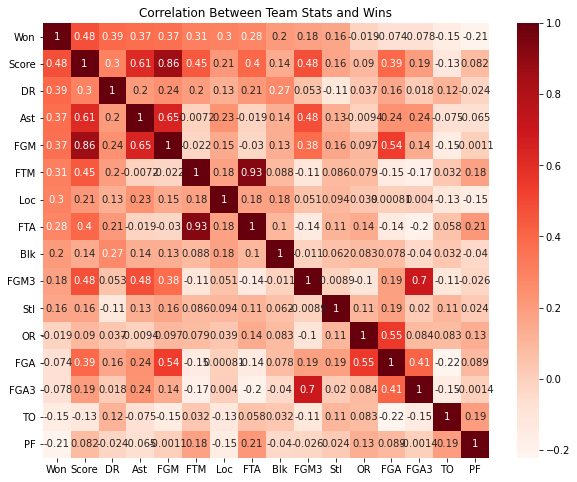

In [10]:
# heatmap to examine the correlation between team stats and wins
plt.figure(figsize=(10,8))
cor = data[['Won', 'Score', 'DR', 'Ast', 'FGM', 'FTM', 'Loc', 'FTA', 'Blk', 'FGM3',
           'Stl', 'OR', 'FGA', 'FGA3', 'TO', 'PF'
                ]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Between Team Stats and Wins')
plt.show()

In [11]:
%%capture --no-display

# want to find optimal parameters

# removed highly correlated params
X = data[['DR', 'Ast', 'FGM', 'Loc', 'FTA', 'Blk',
           'Stl', 'OR', 'FGA', 'FGA3', 'TO', 'PF']]
y = data['Won']

accuracy = []
recall = []
precision = []

for i in range(len(X.columns)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    clf = LogisticRegression(solver='saga', max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    recall.append(tp / (tp + fn))
    precision.append(tp / (tp + fp))
    
    X.drop(columns=X.columns[-1], 
        axis=1, 
        inplace=True)

Text(0.5, 1.0, 'Accuracy, Recall, and Precision for Predictor Combinations')

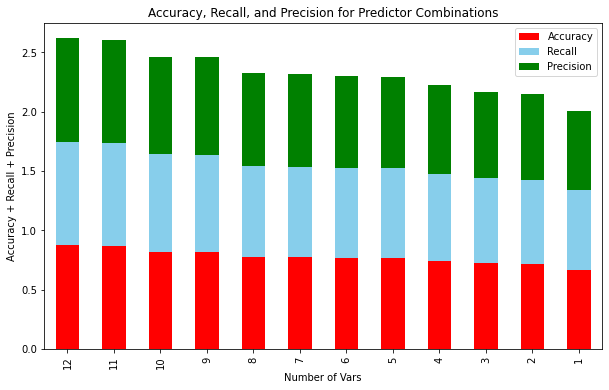

In [12]:
df = pd.DataFrame({'Accuracy': accuracy,
                   'Recall': recall,
                   'Precision': precision},
                 index=['12', '11', '10', '9',
                       '8', '7', '6', '5', '4',
                       '3', '2', '1'])

df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], figsize=(10,6))
plt.xlabel('Number of Vars')
plt.ylabel('Accuracy + Recall + Precision')
plt.title('Accuracy, Recall, and Precision for Predictor Combinations')

Using all vars is best

In [13]:
# finding optimal regularization term
accuracy = []
recall = []
precision = []

X = data[['DR', 'Ast', 'FGM', 'Loc', 'FTA', 'Blk',
           'Stl', 'OR', 'FGA', 'FGA3', 'TO', 'PF']]

# 0 = l2, 0.5 = half/half, 1.0 = l1
l1rs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for l1r in l1rs:
    clf = LogisticRegression(solver='saga', max_iter=1000, penalty = 'elasticnet', l1_ratio = l1r).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    recall.append(tp / (tp + fn))
    precision.append(tp / (tp + fp))

,Accuracy,Recall,Precision
0.0,0.872217,0.870808,0.873386
0.1,0.872202,0.870808,0.873359
0.2,0.872202,0.870808,0.873359
0.3,0.872202,0.870808,0.873359
0.4,0.872217,0.870808,0.873386
0.5,0.872217,0.870808,0.873386
0.6,0.872172,0.870778,0.873330
0.7,0.872217,0.870808,0.873386
0.8,0.872217,0.870808,0.873386
0.9,0.872128,0.870719,0.873296


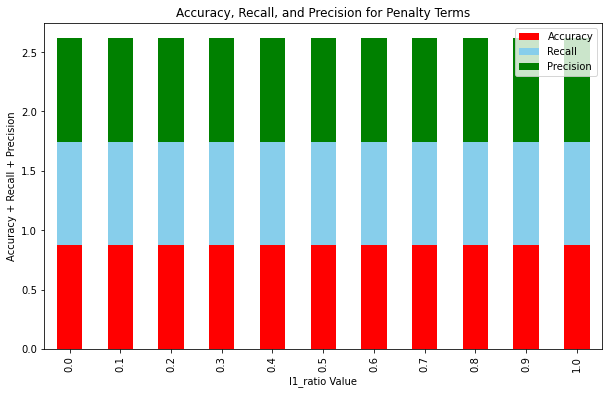

In [14]:
reg_df = pd.DataFrame({'Accuracy': accuracy,
                   'Recall': recall,
                   'Precision': precision},
                 index=l1rs)

reg_df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], figsize=(10,6))
plt.xlabel('l1_ratio Value')
plt.ylabel('Accuracy + Recall + Precision')
plt.title('Accuracy, Recall, and Precision for Penalty Terms')

reg_df

l1 and l2 appear to be about equal performance

In [15]:
# finding optimal C
accuracy = []
recall = []
precision = []

Cs = [0.01, 0.1, 0.5, 1.0, 5, 10, 50, 100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

for c in Cs:
    clf = LogisticRegression(solver='saga', max_iter=1000, C = c).fit(X_val, y_val)
    
    y_pred = clf.predict(X_val)
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    recall.append(tp / (tp + fn))
    precision.append(tp / (tp + fp))

,Accuracy,Recall,Precision
0.01,0.868206,0.863690,0.870373
0.10,0.867912,0.863454,0.870031
0.50,0.867854,0.863395,0.869971
1.00,0.867854,0.863395,0.869971
5.00,0.867883,0.863454,0.869979
10.00,0.867854,0.863395,0.869971
50.00,0.867824,0.863336,0.869964
100.00,0.867824,0.863336,0.869964


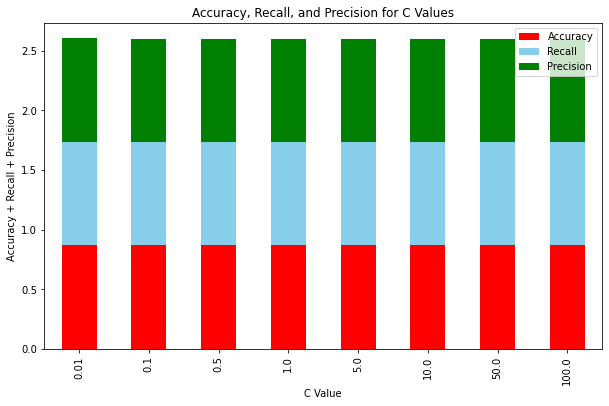

In [16]:
c_df = pd.DataFrame({'Accuracy': accuracy,
                   'Recall': recall,
                   'Precision': precision},
                 index=Cs)

c_df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], figsize=(10,6))
plt.xlabel('C Value')
plt.ylabel('Accuracy + Recall + Precision')
plt.title('Accuracy, Recall, and Precision for C Values')

c_df

C=5 seems to be the best

In [17]:
# Create model
# Regularize
# Test